In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('/Users/michaelkareev/Desktop/Data Science Recruiting Related/Time-Series/three_by_day.csv')

In [9]:
sales.dtypes
sales.head()

Date (Weeks Starting 1st day of Year)    object
Merchant                                 object
MV - Accepted (MCCY)                      int64
dtype: object

In [10]:
#three separate dataframes 
saks = sales[sales['Merchant']=='SAKS.COM']
barneys = sales[sales['Merchant']=='BARNEYS NEW YORK']
nordstrom = sales[sales['Merchant']=='NORDSTROM']

In [15]:
#Drop merchant from respective dataframes
saks.drop('Merchant', axis=1, inplace = True)
barneys.drop('Merchant', axis=1, inplace = True)
nordstrom.drop('Merchant', axis=1, inplace = True)

In [19]:
#Rename the columns to something shorter
#saks.rename(index=str, columns={"Date (Weeks Starting 1st day of Year)": "Date","MV - Accepted (MCCY)" : "MV"}, inplace = True)
#barneys.rename(index=str, columns={"Date (Weeks Starting 1st day of Year)": "Date","MV - Accepted (MCCY)" : "MV"}, inplace = True)
#nordstrom.rename(index=str, columns={"Date (Weeks Starting 1st day of Year)": "Date","MV - Accepted (MCCY)" : "MV"}, inplace = True)

In [24]:
saks['Date'] = pd.to_datetime(saks['Date'])
barneys['Date'] = pd.to_datetime(barneys['Date'])
nordstrom['Date'] = pd.to_datetime(nordstrom['Date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Index column is now a date column
#saks.set_index('Date', inplace = True)
#barneys.set_index('Date', inplace = True)
#nordstrom.set_index('Date', inplace = True)

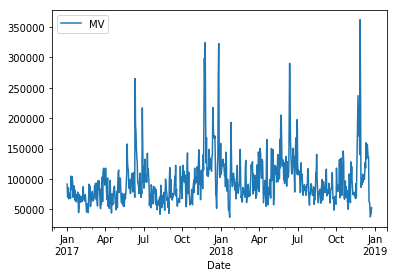

In [32]:
saks.plot(x='Date', y='MV')

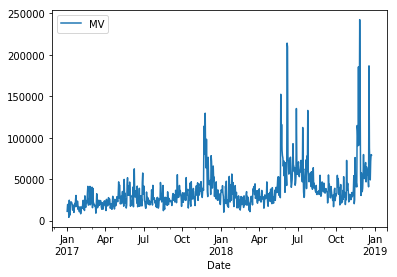

In [34]:
barneys.plot(x='Date', y='MV')

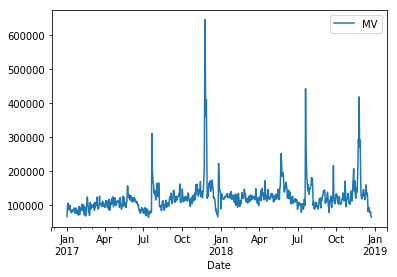

In [35]:
nordstrom.plot(x='Date', y='MV')

In [36]:
nordstrom['MV_log'] = np.log(nordstrom['MV'])
nordstrom.head(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,MV,MV_log
1,2017-01-01,66166,11.099922
4,2017-01-02,96286,11.475078
7,2017-01-03,105711,11.568464
10,2017-01-04,96431,11.476583
13,2017-01-05,85889,11.360811


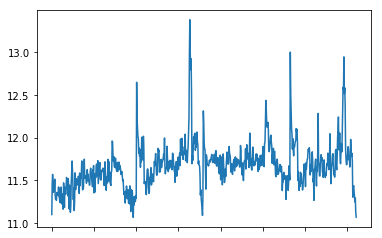

In [37]:
nordstrom['MV_log'].plot()

In [47]:
df_n = nordstrom.copy()
df_n.drop(['MV'], axis =1, inplace = True)
df_n.rename(columns={'MV_log' : 'y'}, inplace = True)
df_n.set_index('Date', inplace = True)
df_n.rename_axis("ds", axis='index', inplace=True)

In [50]:
df_n.reset_index(inplace = True)


In [51]:
df_n.head()

,ds,y
0,2017-01-01,11.099922
1,2017-01-02,11.475078
2,2017-01-03,11.568464
3,2017-01-04,11.476583
4,2017-01-05,11.360811


In [52]:
df_n.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [70]:
#fit the model
m=Prophet(yearly_seasonality = True)
m.fit(df_n)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
#forecasting 365 days into future
n_future = m.make_future_dataframe(periods = 365)
n_future.tail()

,ds
1082,2019-12-19
1083,2019-12-20
1084,2019-12-21
1085,2019-12-22
1086,2019-12-23


In [72]:
#populate the forecast 
n_forecast = m.predict(n_future)
n_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1082,2019-12-19,11.064458,10.599218,11.127297,10.904905,11.194716,-0.193776,-0.193776,-0.193776,-0.025697,-0.025697,-0.025697,-0.168079,-0.168079,-0.168079,0.0,0.0,0.0,10.870683
1083,2019-12-20,11.063081,10.590706,11.123377,10.902867,11.194017,-0.199034,-0.199034,-0.199034,-0.019108,-0.019108,-0.019108,-0.179926,-0.179926,-0.179926,0.0,0.0,0.0,10.864048
1084,2019-12-21,11.061705,10.574012,11.115821,10.901006,11.193317,-0.205003,-0.205003,-0.205003,-0.016957,-0.016957,-0.016957,-0.188046,-0.188046,-0.188046,0.0,0.0,0.0,10.856702
1085,2019-12-22,11.060328,10.642111,11.175280,10.899175,11.192727,-0.154968,-0.154968,-0.154968,0.037643,0.037643,0.037643,-0.192611,-0.192611,-0.192611,0.0,0.0,0.0,10.905359
1086,2019-12-23,11.058951,10.607689,11.174166,10.897343,11.191849,-0.151351,-0.151351,-0.151351,0.042495,0.042495,0.042495,-0.193846,-0.193846,-0.193846,0.0,0.0,0.0,10.907599


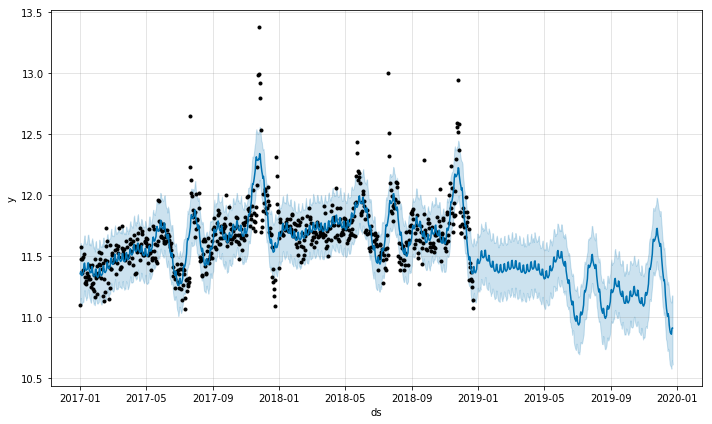

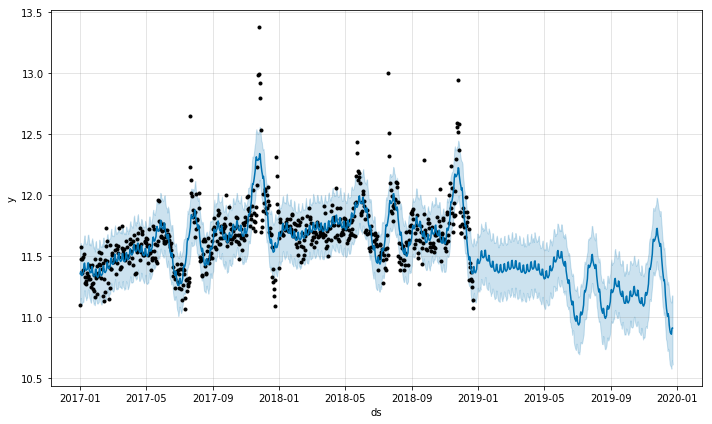

In [73]:
#plot the forecast
m.plot(n_forecast)

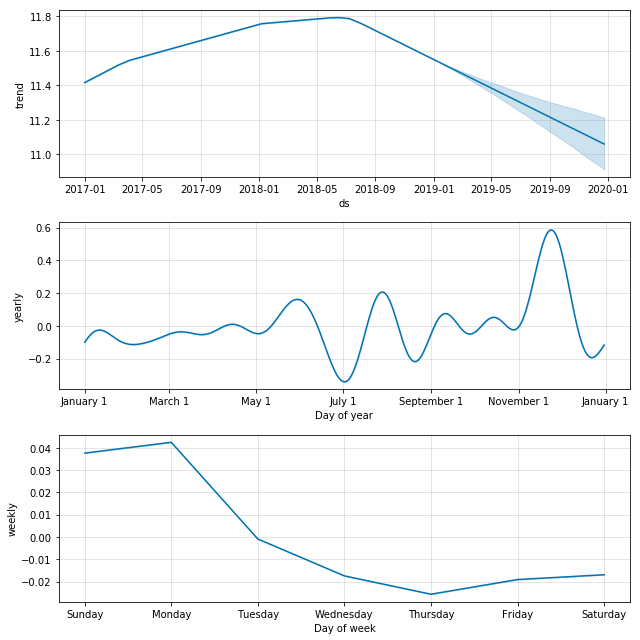

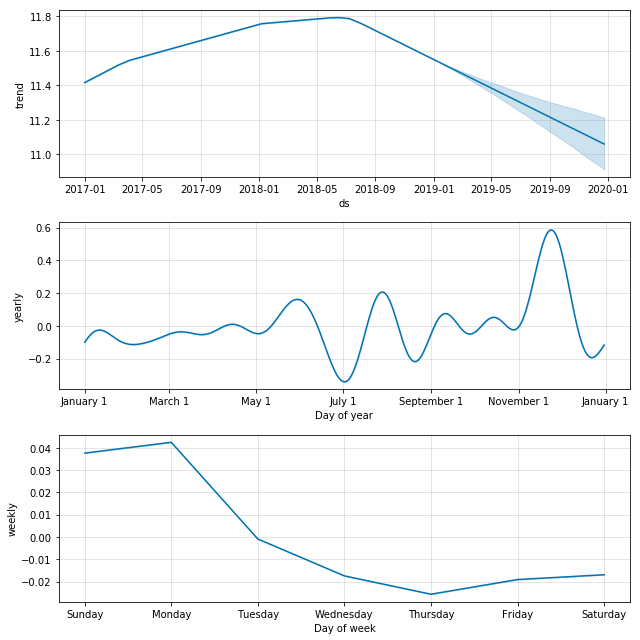

In [57]:
m.plot_components(n_forecast)

#### On the monthly basis

In [59]:
n_future = m.make_future_dataframe(periods = 12,freq='M', include_history = True)
n_future.tail()

,ds
729,2019-07-31
730,2019-08-31
731,2019-09-30
732,2019-10-31
733,2019-11-30


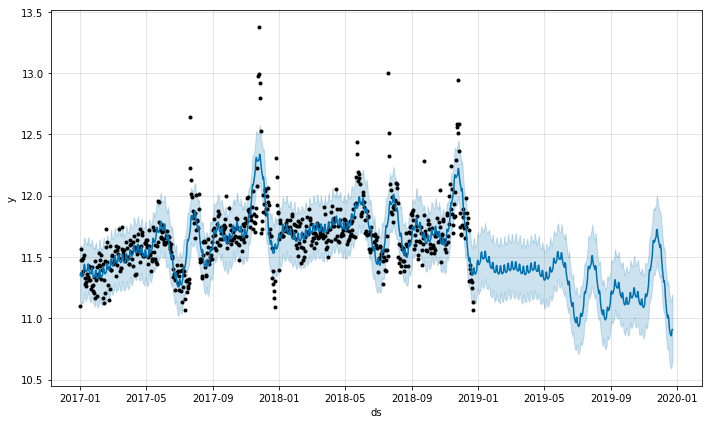

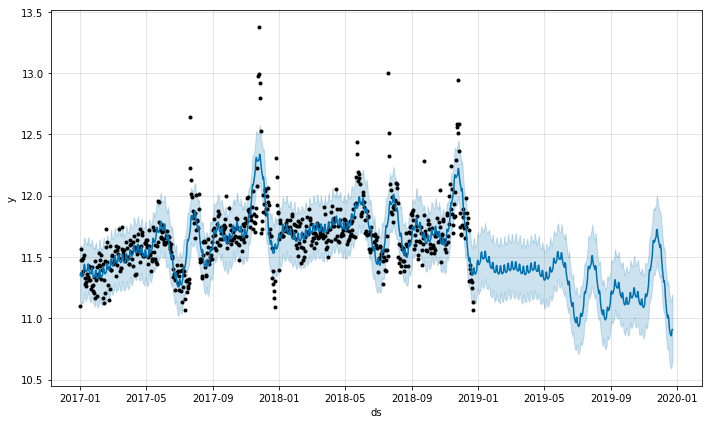

In [60]:
m.plot(n_forecast)

### Cross validation

In [61]:
#on the daily basis, not on the monthly
from fbprophet.diagnostics import cross_validation

In [74]:
metric_df = n_forecast.set_index('ds')[['yhat']].join(df_n.set_index('ds').y).reset_index()

In [75]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
717,2018-12-19,11.378181,11.313401
718,2018-12-20,11.357675,11.247787
719,2018-12-21,11.355673,11.292915
720,2018-12-22,11.352739,11.135144
721,2018-12-23,11.405518,11.069603


In [66]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [76]:
r2_score(metric_df.y, metric_df.yhat)

0.5598006916843219

In [77]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.03142943319549273

In [78]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.11988741169225829

#### Using the built-in method

In [80]:
from fbprophet.diagnostics import cross_validation

In [98]:
df_n_cv = cross_validation(m, initial='182 days', period = 90, horizon = 180)

INFO:fbprophet.diagnostics:Making 539 forecasts with cutoffs between 2017-07-02 23:59:59.999999820 and 2018-12-22 23:59:59.999999820


In [99]:
df_n_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-07-03,11.313280,11.183927,11.434930,11.389356,2017-07-02 23:59:59.999999820
1,2017-07-04,11.288814,11.161921,11.410867,11.224870,2017-07-03 23:59:59.999999820
2,2017-07-05,11.245835,11.126801,11.377267,11.435007,2017-07-04 23:59:59.999999820
3,2017-07-06,11.330954,11.210025,11.463125,11.389729,2017-07-05 23:59:59.999999820
4,2017-07-07,11.338103,11.209754,11.454054,11.134253,2017-07-06 23:59:59.999999820


In [86]:
from fbprophet.diagnostics import performance_metrics

In [100]:
df_p = performance_metrics(df_n_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
383,00:00:00.000000,0.029330,0.171259,0.125471,0.010622,0.849057
382,00:00:00.000000,0.059446,0.243816,0.147917,0.012333,0.830189
381,00:00:00.000000,0.060154,0.245264,0.150197,0.012533,0.811321
380,00:00:00.000000,0.060373,0.245710,0.151118,0.012613,0.811321
379,00:00:00.000000,0.060364,0.245691,0.150784,0.012583,0.811321


In [88]:
from fbprophet.plot import plot_cross_validation_metric

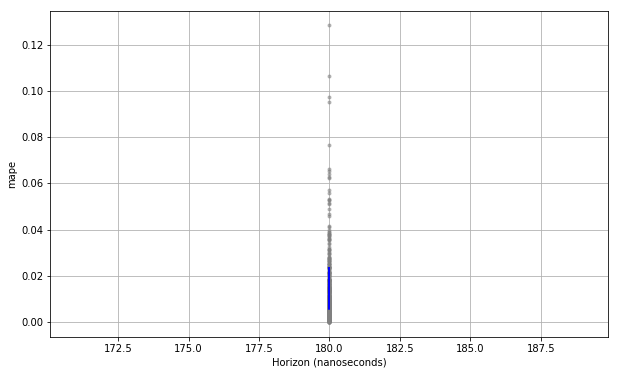

In [101]:
fig = plot_cross_validation_metric(df_n_cv, metric='mape')